In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [20]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [21]:
# Reshape the input data to include a channel dimension
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [22]:
# One-hot encode the target labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [23]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [24]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 [==============================] - 61s 60ms/step - loss: 0.1809 - accuracy: 0.9442 - val_loss: 0.0650 - val_accuracy: 0.9794
Epoch 2/5
938/938 [==============================] - 58s 62ms/step - loss: 0.0519 - accuracy: 0.9835 - val_loss: 0.0488 - val_accuracy: 0.9849
Epoch 3/5
938/938 [==============================] - 59s 63ms/step - loss: 0.0375 - accuracy: 0.9886 - val_loss: 0.0294 - val_accuracy: 0.9895
Epoch 4/5
938/938 [==============================] - 59s 63ms/step - loss: 0.0291 - accuracy: 0.9906 - val_loss: 0.0361 - val_accuracy: 0.9880
Epoch 5/5
938/938 [==============================] - 59s 62ms/step - loss: 0.0241 - accuracy: 0.9923 - val_loss: 0.0280 - val_accuracy: 0.9907


In [26]:
# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 [==============================] - 5s 14ms/step


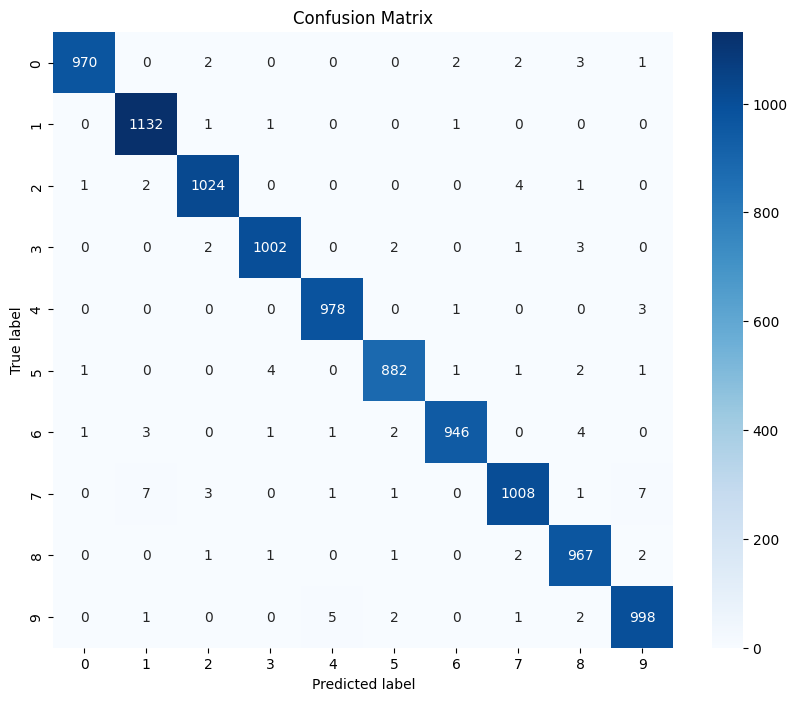

In [27]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()